# Data visualization and Analysis Course Work
## Olusola Timthy Ogundepo
> May 6, 2020

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df= pd.read_csv('child.csv')
df['residence']= df['residence'].str.replace("'", "")
df['ethnicity']= df['ethnicity'].str.replace("'", "")
df.head()

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES


In [3]:
details= [['score', "A numeric value obtained from the standard tests for autism"],
['score2', "A numeric value obtained using alternative (non-standard) tests for autism"],
['age', "The child’s age."],
['cost', "Total cost of testing the child in pounds."],
['gender', "m or f (male or female)"],
['ethnicity', "Child’s ethnicity"],
['jaundice', "Whether the child was born with jaundice"],
['autismFH', "Whether there is family history of autism"],
['residence', "Country of residence"],
['relation', "Who completed the test for the child"],
['autism', "Whether the child has autism (YES or NO)"]]
pd.DataFrame(data= details, columns= ['Name', 'Description'])

,Name,Description
0,score,A numeric value obtained from the standard tes...
1,score2,A numeric value obtained using alternative (no...
2,age,The child’s age.
3,cost,Total cost of testing the child in pounds.
4,gender,m or f (male or female)
5,ethnicity,Child’s ethnicity
6,jaundice,Whether the child was born with jaundice
7,autismFH,Whether there is family history of autism
8,residence,Country of residence
9,relation,Who completed the test for the child


## Question 1
> Produce a plot with the relative proportion of children residing in Australia, Germany, Italy and India.
> Comment on your visualisation and suggests one alternative to your plot, highlighting its advantages. There
> is no need to plot the alternative.

In [4]:
residence_counter= df.groupby('residence').count()
residence_counter.head()

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,relation,autism
residence,,,,,,,,,,
Afghanistan,2,2,2,2,2,2,2,2,2,2
Argentina,1,1,1,1,1,1,1,1,1,1
Armenia,3,3,3,3,3,3,3,3,3,3
Australia,23,23,23,23,23,23,23,23,23,23
Austria,2,2,2,2,2,1,2,2,1,2


In [5]:
residence_plot= residence_counter.loc[['Australia', 'Germany', 'Italy', 'India'], 'score']
residence_plot

residence
Australia    23
Germany       1
Italy         2
India        42
Name: score, dtype: int64

In [6]:
plt.style.use("fivethirtyeight")

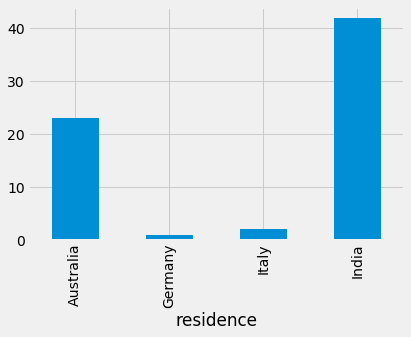

In [7]:
residence_plot.plot(kind= 'bar')

 Among the four countries, it can be seen that most of the children resided in India.
 
 Other chart that can be used to represent this data is a pie chart.
### Advantages of pie chart
* presents data as a simple and easy-to-understand picture
* visually simpler than other types of graphs
* excellent when few classes of data are involved

## Question 2
>Use univariate statistics on at least the first 4 attributes to describe the data. Discuss the results obtained,
>highlighting any result which you consider particularly useful. Use visualisations if needed.

In [8]:
autism_table= df.pivot_table(index= ['autism'])
autism_table

,age,cost,score,score2
autism,,,,
NO,4.278146,1566.307947,4.510596,4.534437
YES,4.113475,2363.475177,8.411348,8.409220


Text(0.5, 1.0, 'Boxplot of Score by Autism status')

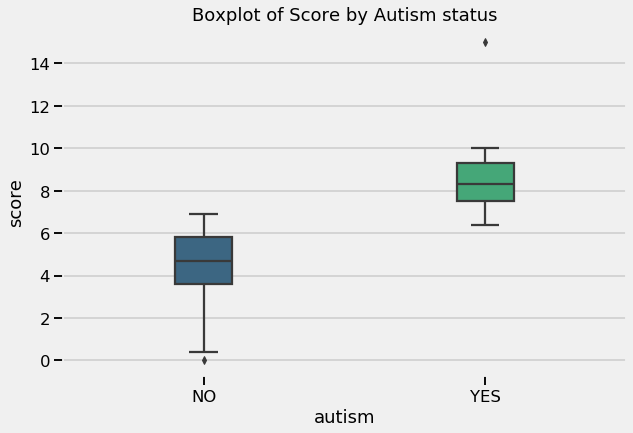

In [9]:
sns.set_context('talk')
plt.figure(figsize= (9, 6))
sns.boxplot(x= 'autism', y='score', data= df, width= 0.2, palette= 'viridis')
plt.title('Boxplot of Score by Autism status')

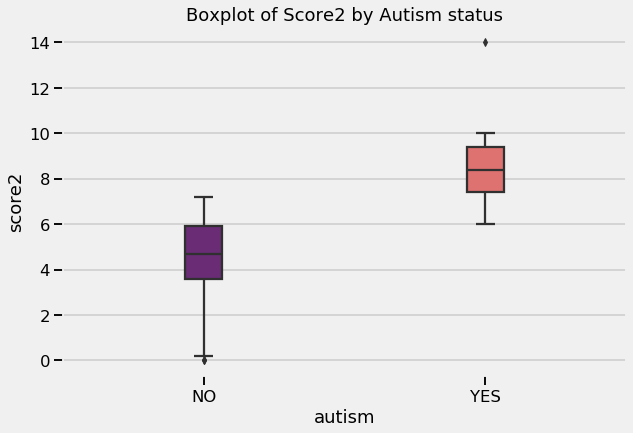

In [10]:
plt.figure(figsize= (9, 6))
plt.title('Boxplot of Score2 by Autism status')
sns.boxplot(x= 'autism', y='score2', data= df, width= 0.13, palette= 'magma')

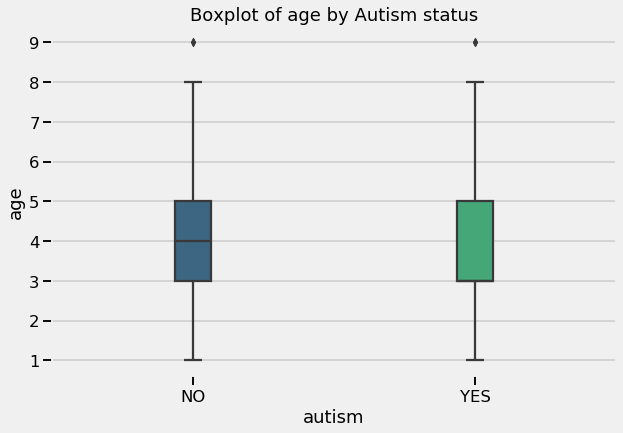

In [11]:
plt.figure(figsize= (9, 6))
plt.title('Boxplot of age by Autism status')
sns.boxplot(x= 'autism', y='age', data= df, width= 0.13, palette= 'viridis')

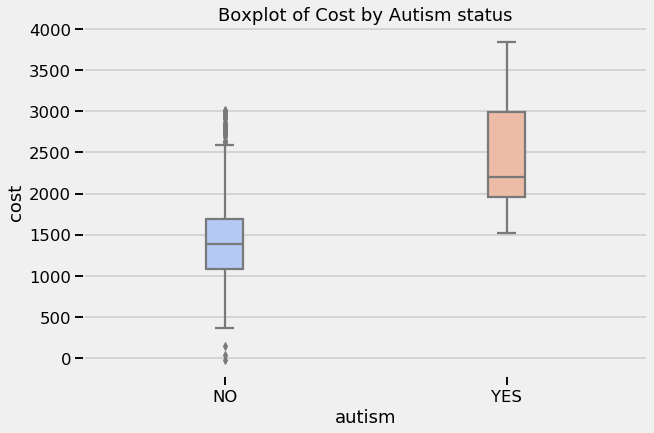

In [12]:
plt.figure(figsize= (9, 6))
plt.title('Boxplot of Cost by Autism status')
sns.boxplot(x= 'autism', y='cost', data= df, width= 0.13,  palette= 'coolwarm', )

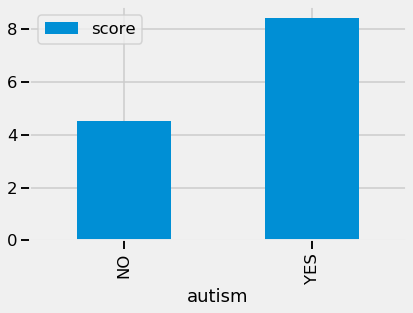

In [13]:
autism_table[['score']].plot(kind= 'bar')

<strong>Box plots</strong> are useful, since by construction we focused on the overlap (or not) of the quartiles of the distribution. In this case, we might ask the question like: is there sufficient differences in the quartiles for the feature
to be useful in separating the label classes? It seems that all numerical features are useful in separating
between children that have autism from those that did not.

As one might expect, the cost of testing the the children with autism is high compare to children without
autism. Also, both standard test and alternative (non-standard) test scores are higher for children with
autism than children without autism.

## Part 2

In [14]:
df.head()

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES


C:\Users\SHOLAY\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


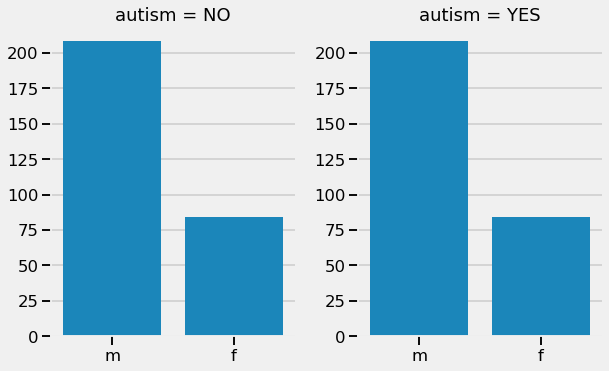

In [15]:
g= sns.FacetGrid(col= 'autism', data= df, height= 5.5, sharey= False, aspect= 0.8, margin_titles= True);
g.map(sns.countplot, x= df['gender']);
plt.tight_layout();

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(df[['score']], df['score2'], test_size= 0.2)

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.score(Xtest, ytest)

0.982029235372632

In [19]:
# The predicted value for the alternative score(score2) with standard score of 7 is
np.round(model.predict([[7]]), 2)

array([7.01])

In [20]:
# The predicted value for the alternative score(score2) with standard score of 12 is
np.round(model.predict([[12]]), 2)

array([11.96])

In [21]:
df.head()

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES


### Different method of assigning

In [22]:
# This is not inplace
df.assign(ageGroup= ['Five and below' if i <= 5  else 'Six and above' for i in df['age']])

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism,ageGroup
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO,Five and below
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO,Five and below
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO,Five and below
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO,Five and below
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES,Five and below
...,...,...,...,...,...,...,...,...,...,...,...,...
287,9.7,10.0,6,3230.0,f,White-European,yes,yes,United Kingdom,Parent,YES,Six and above
288,3.6,4.1,6,2747.5,f,White-European,yes,yes,Australia,Parent,NO,Six and above
289,7.0,7.5,3,1840.0,m,Latino,no,no,Brazil,Parent,YES,Five and below
290,9.6,9.9,3,2490.0,m,South Asian,no,no,India,Parent,YES,Five and below


In [23]:
def ageGrouper(age):
    if age > 5:
        return 'Six and above'
    else:
        return 'Five and below'


In [24]:
df['ageGroup']= df.age.apply(ageGrouper)

In [25]:
df.query("ageGroup == 'Five and below'")

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism,ageGroup
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO,Five and below
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO,Five and below
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO,Five and below
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO,Five and below
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES,Five and below
...,...,...,...,...,...,...,...,...,...,...,...,...
285,8.9,9.0,1,2135.0,f,White-European,no,no,Australia,Care professional',YES,Five and below
286,9.0,8.8,4,2340.0,f,Latino,yes,no,Bhutan,Parent,YES,Five and below
289,7.0,7.5,3,1840.0,m,Latino,no,no,Brazil,Parent,YES,Five and below
290,9.6,9.9,3,2490.0,m,South Asian,no,no,India,Parent,YES,Five and below


In [26]:
d1= df[df.ageGroup== 'Five and below']
d1

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism,ageGroup
0,4.6,4.4,5,1170.0,m,Others,no,no,Jordan,Parent,NO,Five and below
1,4.4,4.4,5,1090.0,m,Middle Eastern,no,no,Jordan,Parent,NO,Five and below
2,4.8,4.3,5,1130.0,m,NaN,no,no,Jordan,NaN,NO,Five and below
3,3.6,3.6,4,980.0,f,NaN,yes,no,Jordan,NaN,NO,Five and below
4,9.7,9.5,4,2475.0,m,Others,yes,no,United States,Parent,YES,Five and below
...,...,...,...,...,...,...,...,...,...,...,...,...
285,8.9,9.0,1,2135.0,f,White-European,no,no,Australia,Care professional',YES,Five and below
286,9.0,8.8,4,2340.0,f,Latino,yes,no,Bhutan,Parent,YES,Five and below
289,7.0,7.5,3,1840.0,m,Latino,no,no,Brazil,Parent,YES,Five and below
290,9.6,9.9,3,2490.0,m,South Asian,no,no,India,Parent,YES,Five and below


In [27]:
df.query("ageGroup== 'Six and above'").head(3)

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism,ageGroup
15,10.0,10.0,7,3267.5,m,White-European,no,no,Malta,Parent,YES,Six and above
17,0.5,0.0,6,2557.5,m,Others,no,no,United States,Parent,NO,Six and above
21,4.7,5.1,8,2830.0,f,NaN,no,no,Egypt,NaN,NO,Six and above


In [28]:
d2= df[df.ageGroup== 'Six and above']
d2.head()

,score,score2,age,cost,gender,ethnicity,jaundice,autismFH,residence,relation,autism,ageGroup
15,10.0,10.0,7,3267.5,m,White-European,no,no,Malta,Parent,YES,Six and above
17,0.5,0.0,6,2557.5,m,Others,no,no,United States,Parent,NO,Six and above
21,4.7,5.1,8,2830.0,f,NaN,no,no,Egypt,NaN,NO,Six and above
32,7.0,6.9,9,3025.0,m,NaN,no,no,Egypt,NaN,YES,Six and above
35,1.5,1.8,6,2625.0,f,Middle Eastern,yes,no,Syria,Parent,NO,Six and above


# Age Group--> Six and Above

In [29]:
familyAutism= pd.crosstab([d2.autismFH, d2.residence], [d2.ageGroup])
familyAutism

ageGroup                       Six and above
autismFH residence                          
no       Armenia                           2
         Australia                         3
         Canada                            1
         Egypt                             6
         India                             3
         Japan                             1
         Jordan                            6
         Malta                             1
         New Zealand                       6
         Oman                              1
         Pakistan                          1
         Philippines                       1
         Qatar                             1
         Russia                            1
         Saudi Arabia                      1
         Syria                             1
         United Arab Emirates              1
         United Kingdom                   12
         United States                    11
yes      Australia                         4
         Canada                            1
         Jordan                            1
         New Zealand                       1
         United Kingdom                    4
         United States                     1

### Age Group of Family history of Autism

In [30]:
fAy= familyAutism.xs('yes')
fAy

ageGroup,Six and above
residence,
Australia,4
Canada,1
Jordan,1
New Zealand,1
United Kingdom,4
United States,1


Text(0.5, 1.0, 'Age group of Six and above that have autism')

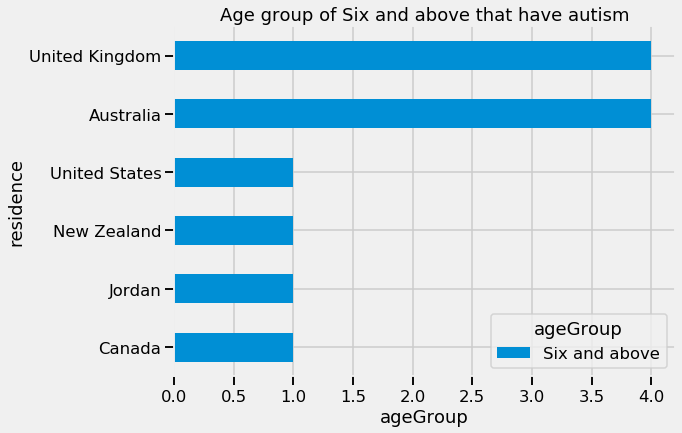

In [31]:
fAy.sort_values(by= "Six and above").plot(kind= 'barh', figsize= (8, 6))
plt.xlabel('ageGroup')
plt.title("Age group of Six and above that have autism")

### Age Group of Family without history of Autism in the Country

In [32]:
fAn= familyAutism.xs('no')
fAn.head()

ageGroup,Six and above
residence,
Armenia,2
Australia,3
Canada,1
Egypt,6
India,3


Text(0.5, 1.0, 'Age group of six above that do not have autism')

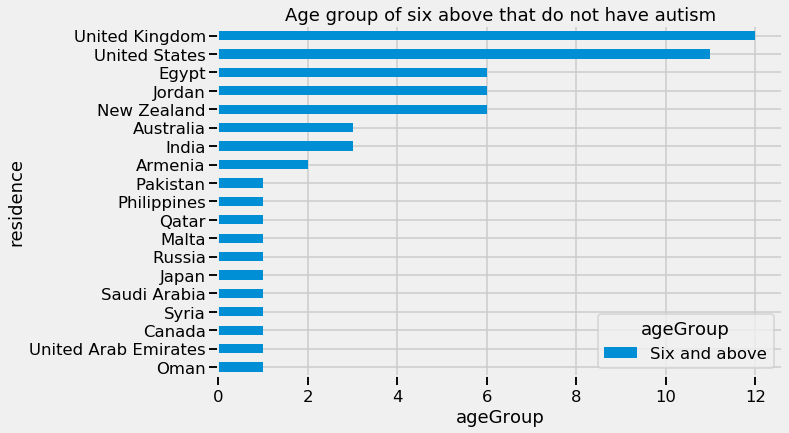

In [33]:
fAn.sort_values(by= "Six and above").plot(kind= 'barh', figsize= (9, 6))
plt.xlabel('ageGroup')
plt.title("Age group of six above that do not have autism")

# Age Group Five and below

### Age Group of Family history of Autism

In [34]:
familyAutism2= pd.crosstab([d1.autismFH, d1.residence], [d1.ageGroup])
familyAutism2

ageGroup                       Five and below
autismFH residence                           
no       Afghanistan                        2
         Argentina                          1
         Armenia                            1
         Australia                         13
         Austria                            1
...                                       ...
yes      Saudi Arabia                       1
         Turkey                             1
         United Arab Emirates               2
         United Kingdom                    10
         United States                      6

[64 rows x 1 columns]

In [35]:
fAys= familyAutism2.xs('yes')
fAys.head()

ageGroup,Five and below
residence,
Australia,3
Austria,1
Bangladesh,1
Brazil,1
Canada,1


Text(0.5, 1.0, 'Age group of Five below that have autism')

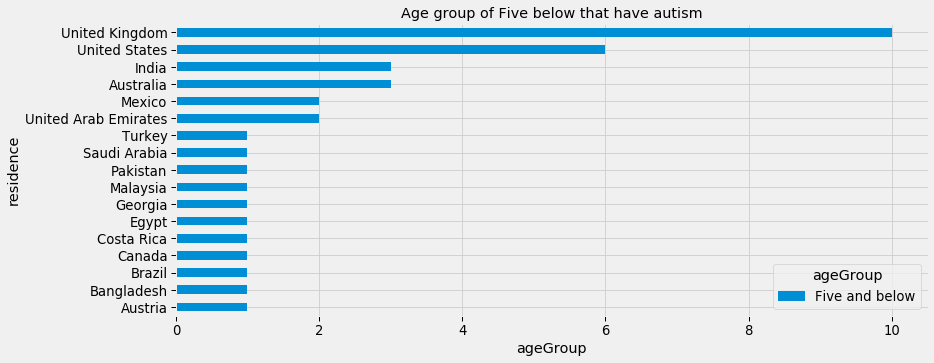

In [36]:
sns.set_context(context= 'paper', font_scale= 1.5)
fAys.sort_values(by= 'Five and below').plot(kind= 'barh', figsize= (12, 5))
plt.xlabel('ageGroup')
plt.title("Age group of Five below that have autism")

### Age Group of Family without history of Autism in the Country

In [37]:
fAno= familyAutism2.xs('no')
fAno.head()

ageGroup,Five and below
residence,
Afghanistan,2
Argentina,1
Armenia,1
Australia,13
Austria,1


Text(0.5, 1.0, 'Age group of Five below that do not have autism')

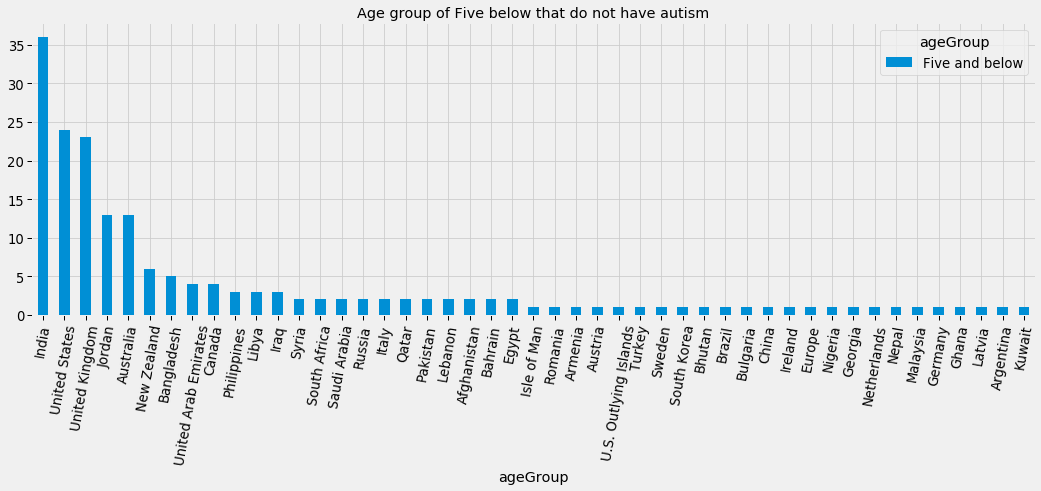

In [38]:
fAno.sort_values(ascending= False, by= 'Five and below').plot(kind= 'bar', figsize= (16, 5))
plt.xticks(rotation = 80)
plt.xlabel('ageGroup')
plt.title("Age group of Five below that do not have autism")